In [1]:
%reload_ext autoreload
%autoreload 2

In [2]:
import numpy as np
# import matplotlib
# matplotlib.use('qtagg')
import matplotlib.pyplot as plt
# plt.ion()

from pytrans.analysis.mode_solver import HarmonicTrap
from pytrans.ions import Ca40
from pytrans.plotting import plotting as pp

from pytrans.analysis import analyse_potential

--------------
Trap potential analysis for ion Average[Ca40, Ca40]: 
Equilibrium position [um]
[-0.004   0.0114  0.0032]
Gradient [V/m]
[-0.3422  0.091   0.0092]
Displacement at 1 MHz [um]
[-0.0209  0.0056  0.0006]
Hessian [V/m2]
[[ 1.1053e+08  0.0000e+00  3.0000e+07]
 [ 0.0000e+00  1.6351e+07 -3.0000e+07]
 [ 3.0000e+07 -3.0000e+07  1.4716e+08]]
Normal mode frequencies [MHz]
[0.756954 2.42429 3.21089]
Eigenvectors
[[0.0671 -0.972 -0.226]
 [0.889 0.161 -0.428]
 [0.452 -0.172 0.875]]
Tilt angle of mode 2 (3.21): 101.15°
--------------
Mode solver analysis for ion crystal [Ca40, Ca40]: 
Equilibrium positions [um]
[[-0.2265  3.2804  0.7635]
 [ 0.2262 -3.2793 -0.7632]]
Normal modes
  Freq [MHz]               Ca40                       Ca40
------------  --------  -------  -------  --------  ------  -------
       0.757  -0.04743   0.6871   0.1599  -0.04743  0.6871   0.1599
       1.311   0.04743  -0.6871  -0.1599  -0.04743  0.6871   0.1599
       2.303  -0.6289   -0.1138   0.3026   0.6289  

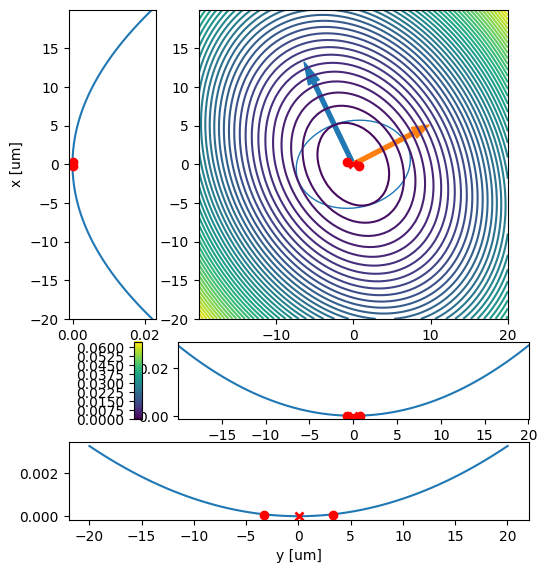

In [3]:
htrap = HarmonicTrap(fx=2.6e6, fy=1e6, fz=3e6, ion=Ca40, stray_field=[0, 0, 0])
htrap._H_dc[1, 2] = htrap._H_dc[2, 1] = -3e7
htrap._H_dc[0, 2] = htrap._H_dc[2, 0] = 3e7

r0 = np.random.randn(2, 3) * 1e-8

res = analyse_potential(htrap, None, ions=[Ca40]*2, r0=r0, verbose=False, roi=(20e-6, 20e-6, 20e-6), trap_axis='y')
res


In [4]:
from models.surface_trap import SurfaceTrap

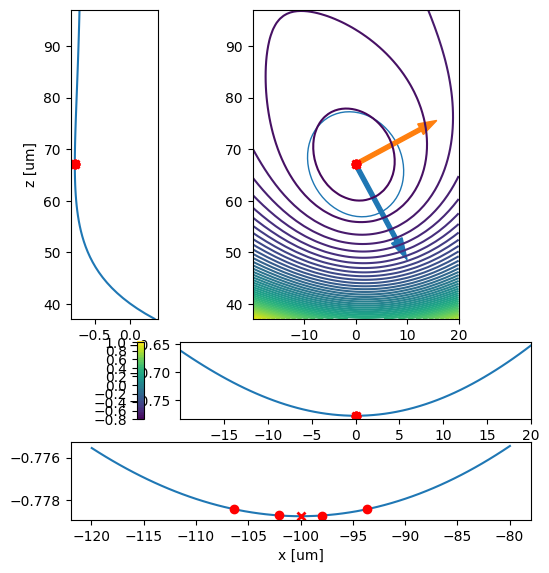

In [5]:
trap = SurfaceTrap()
voltages = np.load('transport\waveform.npy')[0]
r0 = np.asarray([trap.x_ele(2), 0, trap.z0]) + np.random.randn(3) * 1e-8

res = analyse_potential(trap, voltages, ions=[Ca40] * 4, r0=r0, verbose=False, roi=(20e-6, 20e-6, 30e-6))
# res


In [6]:
from pytrans.plotting.plotting import plot3d_contours

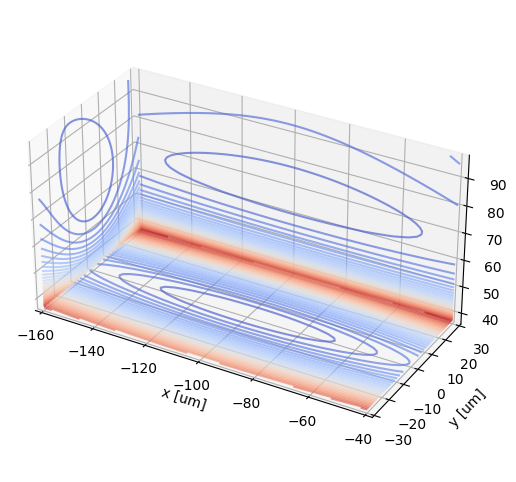

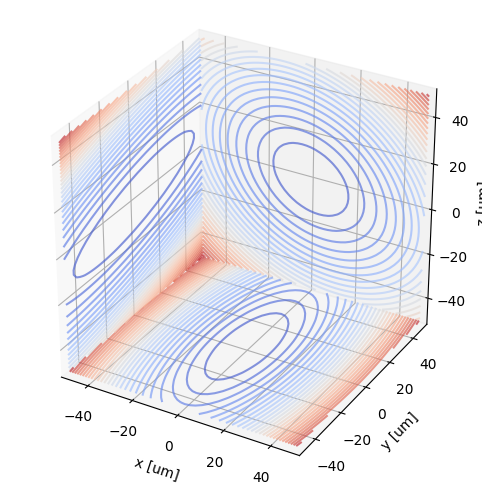

In [7]:
r0 = (trap.x_ele(2), 0, trap.z0)
roi = (60e-6, 30e-6, 30e-6)
plot3d_contours(trap, voltages, ion=Ca40, r0=r0, roi=roi, pseudo=True)

r0 = (0, 0, 0)
roi = (50e-6, 50e-6, 50e-6)
plot3d_contours(htrap, voltages=None, ion=Ca40, r0=r0, roi=roi, pseudo=True)

